

1.Use Pandas to import the data from epa-sea-level.csv.

2.Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axix.

3.Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

4.Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

5.The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns
from scipy.stats import linregress

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving epa-sea-level.csv to epa-sea-level (1).csv


In [ ]:
data = io.BytesIO(uploaded['epa-sea-level.csv'])

In [ ]:
df = pd.read_csv(
    data,
    header=0,
    names=['Year',
           'CSIRO Adjusted Sea Level',
           'Lower Error Bound',
           'Upper Error Bound',
           'NOAA Adjusted Sea Level'],
)

In [ ]:
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


Text(0, 0.5, 'CSIRO Adjusted Sea Level')

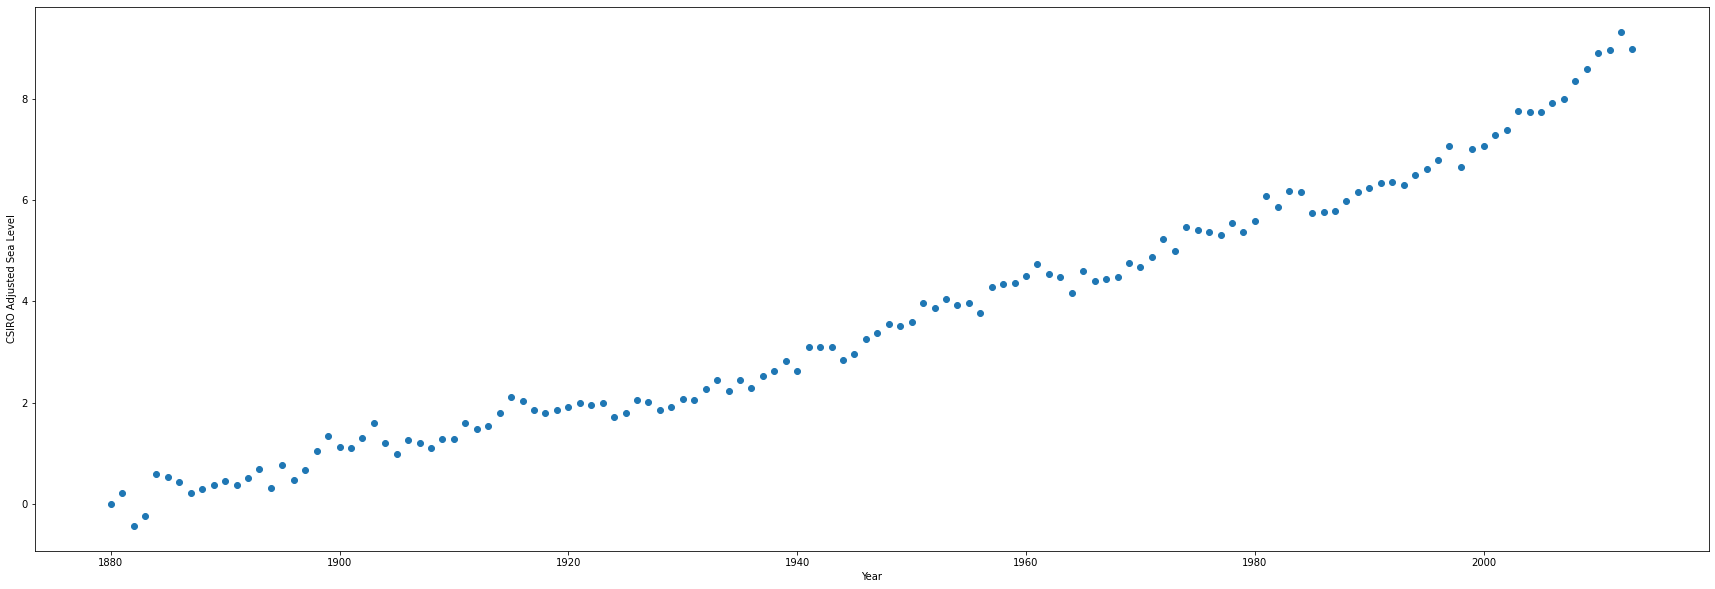

In [ ]:
plt.figure(figsize=(30, 10))
plt.scatter(x = df['Year'], y = df['CSIRO Adjusted Sea Level'])
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')

In [ ]:
data2 = [x for x in range(1880, 2051)]
df2 = pd.DataFrame(data2, columns=['Year'])
df2

,Year
0,1880
1,1881
2,1882
3,1883
4,1884
...,...
166,2046
167,2047
168,2048
169,2049


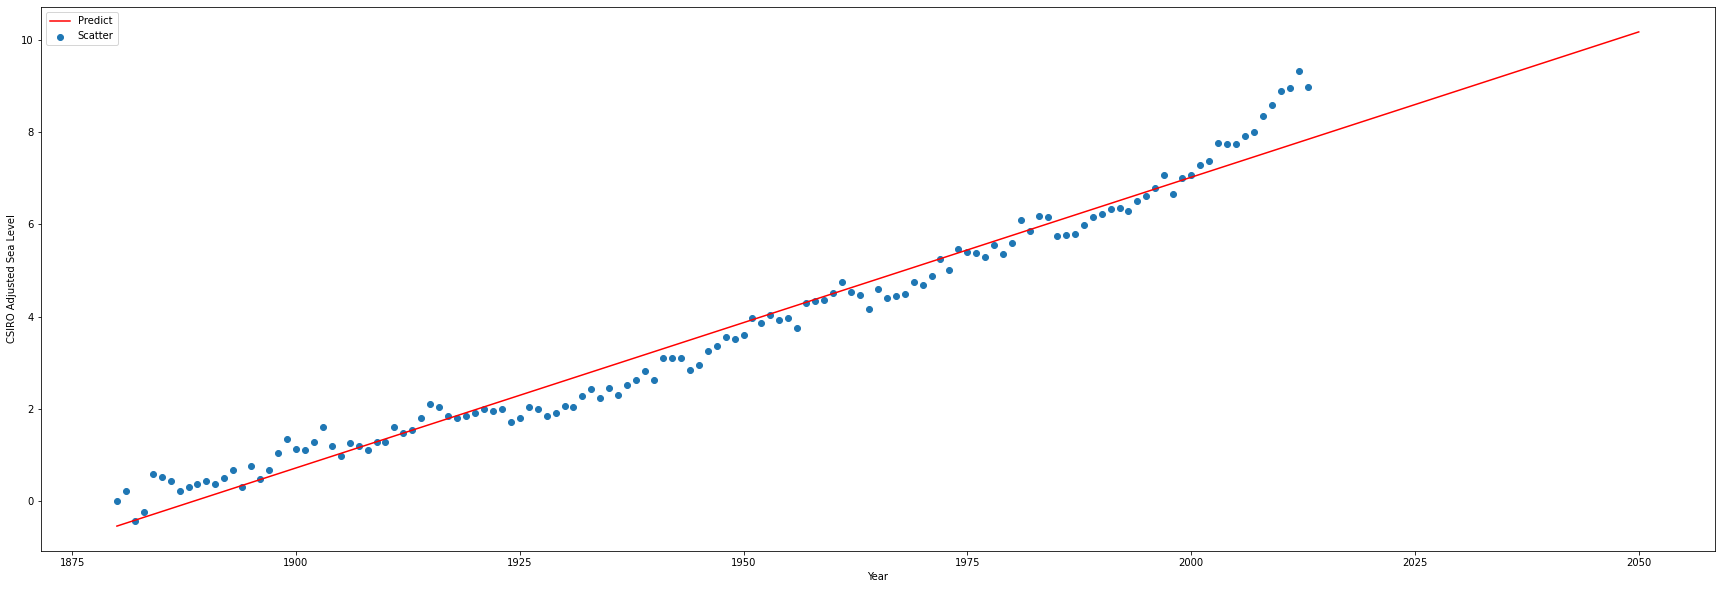

In [ ]:
res = linregress(x = df['Year'], y = df['CSIRO Adjusted Sea Level'])
plt.figure(figsize=(30, 10))
plt.plot(df2['Year'], res.intercept + res.slope*df2['Year'], 'r', label='Predict')
plt.scatter(x = df['Year'], y = df['CSIRO Adjusted Sea Level'], label='Scatter')
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.legend()

In [ ]:
data3 = [x for x in range(2000, 2051)]
df3 = pd.DataFrame(data3, columns=['Year'])
df3.head()

,Year
0,2000
1,2001
2,2002
3,2003
4,2004


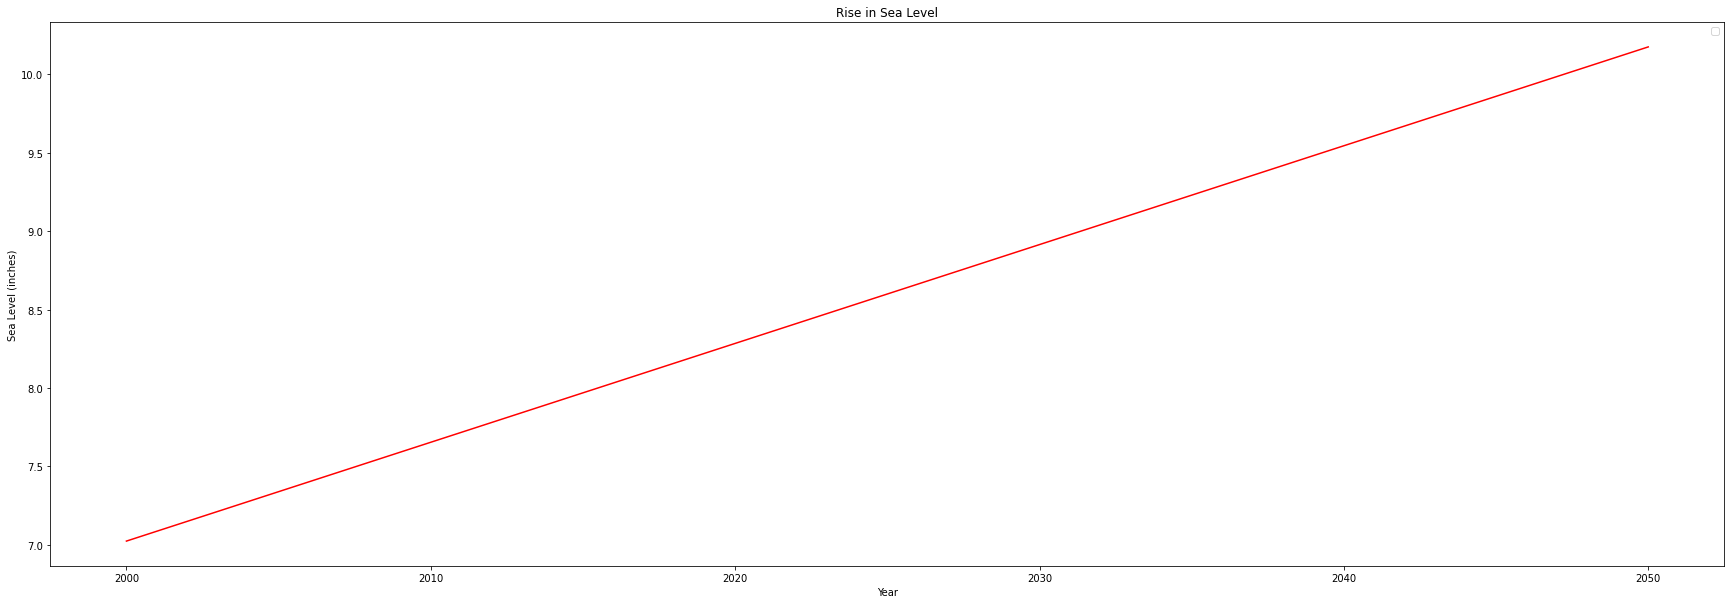

In [ ]:
res2 = linregress(x = df['Year'], y = df['CSIRO Adjusted Sea Level'])
plt.figure(figsize=(30, 10))
plt.plot(df3['Year'], res2.intercept + res2.slope*df3['Year'], 'r')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()